In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I) Import data

In [2]:
calendar=pd.read_csv("../Data/calendar.csv")
train=pd.read_csv("../Data/sales_train_validation.csv")
prices=pd.read_csv("../Data/sell_prices.csv")
sample_submission=pd.read_csv("../Data/sample_submission.csv")

#### 1) Calendar

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 215.4+ KB


In [4]:
print("Number of day in the", calendar.shape[0])
print("Number of feature for each day", calendar.shape[1])
calendar.head(10)

Number of day in the 1969
Number of feature for each day 14


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [5]:
#week id
calendar.wm_yr_wk.nunique()

282

In [6]:
#day of the week
calendar.wday.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [7]:
#year
calendar.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

In [8]:
calendar.event_name_1.unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [31]:
calendar.event_type_1.unique()

array([-1, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [32]:
calendar.event_name_2.unique()

array([-1, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [33]:
calendar.event_type_2.unique()

array([-1, 'Cultural', 'Religious'], dtype=object)

In [34]:
#What is event_name 2 and event type 2?
#Suspected: 2 events on the same day?

calendar=calendar.fillna(-1) #Fill na
calendar[(calendar.event_name_1!=-1) & (calendar.event_name_2!=-1)]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,Cultural,0,0,0
827,2013-05-05,11315,Sunday,2,5,2013,d_828,OrthodoxEaster,Religious,Cinco De Mayo,Cultural,1,1,1
1177,2014-04-20,11412,Sunday,2,4,2014,d_1178,Easter,Cultural,OrthodoxEaster,Religious,0,0,0
1233,2014-06-15,11420,Sunday,2,6,2014,d_1234,NBAFinalsEnd,Sporting,Father's day,Cultural,0,1,1
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


Question: Does having the event order switch matter?

In [35]:
# Has event name 1 but not event type 1 ?
print(len(calendar[(calendar.event_name_1!=-1)&(calendar.event_type_1==-1)]))

# Has event name 2 but not event type 2?
print(len(calendar[(calendar.event_name_2!=-1)&(calendar.event_type_2==-1)]))

0
0


### 2) train

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [37]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [38]:
train.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [39]:
#Should item_id = length of the dataframe? Answer: Not quite
train.item_id.nunique()

3049

In [40]:
#It seems like each item repeated 10 times....
train.item_id.value_counts().head()

HOUSEHOLD_2_124    10
HOUSEHOLD_2_141    10
HOUSEHOLD_1_371    10
HOUSEHOLD_1_045    10
FOODS_1_192        10
Name: item_id, dtype: int64

In [41]:
#Since there are 10 store in total.
train.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [42]:
#Wait, does it mean that all 3049 items are in each store? 
#Answer: Yes, 
day_columns=train.columns[6:]
# train.loc[:,'total_sale'] = train.loc[:,day_columns].sum(axis=1)

#Add all the days by row and check if there is a item =0 
train.loc[:,day_columns].sum(axis=1).sort_values().head()

6682     10
6048     12
27606    13
20192    16
26276    16
dtype: int64

So they are available in all store (appear at least once in 1913 days)!

#### 3) Prices

In [43]:
print(prices.shape)
prices.head()

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [44]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [45]:
#The id of the week: wm_yr_wk

print(prices['wm_yr_wk'].nunique())
print(1913/7) #Number of day is 1913

#Something odd here...

282
273.2857142857143


In [46]:
prices.item_id.nunique()

3049

In [47]:
#There are 10 different store, and 282 weeks so 2820 means the item is listed every weak
#592 is not divisible by 10, it shows that some item is listed in a few weeks and vary across different store
prices.item_id.value_counts(ascending=True).iloc[[0,1,-2,-1]]

FOODS_2_379       530
FOODS_3_296       592
FOODS_1_217      2820
HOBBIES_1_233    2820
Name: item_id, dtype: int64

In [48]:
#What about same item of different state?
prices[(prices.item_id=='HOBBIES_1_005') & (prices.wm_yr_wk==11325) ]

,store_id,item_id,wm_yr_wk,sell_price
930,CA_1,HOBBIES_1_005,11325,3.08
699362,CA_2,HOBBIES_1_005,11325,3.08
1336710,CA_3,HOBBIES_1_005,11325,3.08
2030729,CA_4,HOBBIES_1_005,11325,2.98
2709772,TX_1,HOBBIES_1_005,11325,2.73
3409553,TX_2,HOBBIES_1_005,11325,2.73
4110772,TX_3,HOBBIES_1_005,11325,2.98
4801895,WI_1,HOBBIES_1_005,11325,3.08
5467775,WI_2,HOBBIES_1_005,11325,3.08
6145975,WI_3,HOBBIES_1_005,11325,3.08


Clearly, this show that sell_price  for each **state and store** are some time different

# II) Visualization

#### 1) Number of sale one item

In [53]:
random_item=train.sample(random_state=168).id.values[0]

#Date
date=range(1,1914)

#Number of sale
sale_quantity=train[train.id==random_item].iloc[:,6:].values[0]

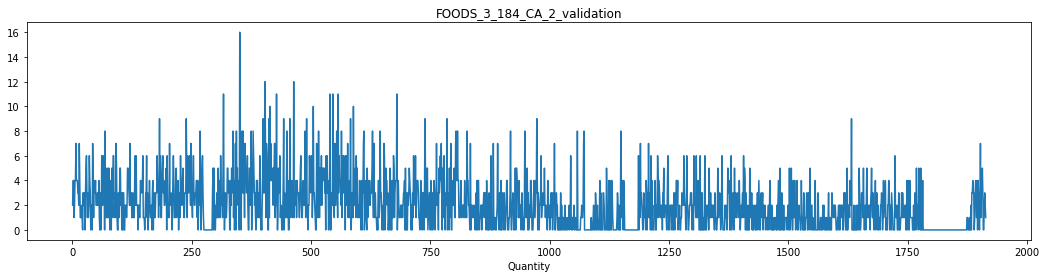

In [58]:
plt.figure(figsize=(18,4))
plt.title(random_item)
plt.xlabel("Day")
plt.xlabel("Quantity")
plt.plot(date,sale_quantity)
plt.show()

In [59]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### 2) Quantity sell per store

In [92]:
def plot_store(store_names):
    plt.figure(figsize=(16,4))

    store_df=train.groupby('store_id', as_index=False).sum()
    quantity_1=store_df[store_df.store_id==store_names[0]].values[0][1:]
    quantity_2=store_df[store_df.store_id==store_names[1]].values[0][1:]
    quantity_3=store_df[store_df.store_id==store_names[2]].values[0][1:]

    fig.suptitle('Horizontally stacked subplots')
    plt.plot(date, quantity_1,label=store_names[0])
    plt.plot(date, quantity_2,label=store_names[1])
    plt.plot(date, quantity_3,label=store_names[2])

    plt.xlabel('Day')
    plt.ylabel('Quantity')
    plt.legend()

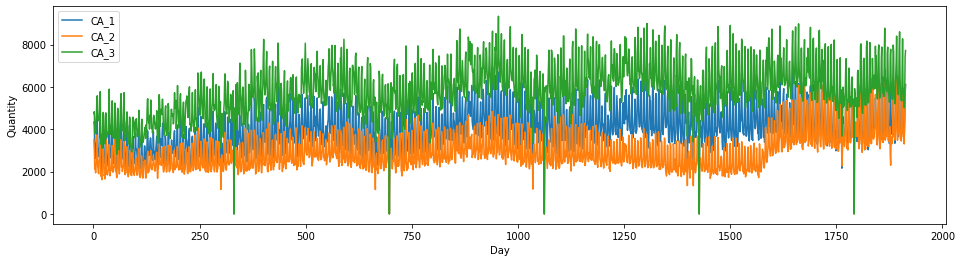

In [93]:
store_names=['CA_1','CA_2','CA_3']
plot_store(store_names)

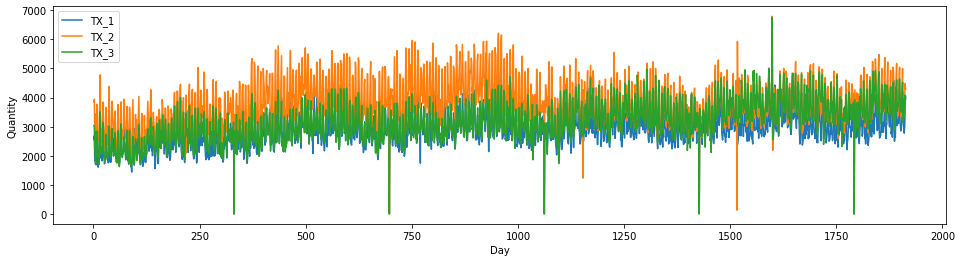

In [95]:
store_names=['TX_1','TX_2','TX_3']
plot_store(store_names)

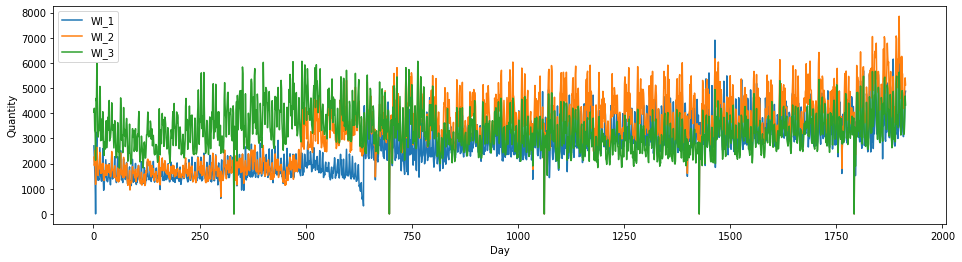

In [96]:
store_names=['WI_1','WI_2','WI_3']
plot_store(store_names)

### 3) Date/Month/Year

In [99]:
train['']

id          HOBBIES_1_001_CA_1_validationHOBBIES_1_002_CA_...
item_id     HOBBIES_1_001HOBBIES_1_002HOBBIES_1_003HOBBIES...
dept_id     HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1HOBBIES_1H...
cat_id      HOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBBIESHOBB...
store_id    CA_1CA_1CA_1CA_1CA_1CA_1CA_1CA_1CA_1CA_1CA_1CA...
state_id    CACACACACACACACACACACACACACACACACACACACACACACA...
d_1                                                     32631
d_2                                                     31749
d_3                                                     23783
d_4                                                     25412
d_5                                                     19146
d_6                                                     29211
d_7                                                     28010
d_8                                                     37932
d_9                                                     32736
d_10                                                    25572
d_11    